In [1]:
] add LaTeXStrings

    Updating registry at `C:\Users\Azulz\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Azulz\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Azulz\.julia\environments\v1.8\Manifest.toml`


In [2]:
] update LaTeXStrings

    Updating registry at `C:\Users\Azulz\.julia\registries\General.toml`
   Installed SortingAlgorithms ─ v1.1.1
  No Changes to `C:\Users\Azulz\.julia\environments\v1.8\Project.toml`
    Updating `C:\Users\Azulz\.julia\environments\v1.8\Manifest.toml`
  [a2af1166] ↑ SortingAlgorithms v1.1.0 ⇒ v1.1.1
Precompiling project...
  ✓ SortingAlgorithms
  ✓ StatsBase
  ✓ ColorVectorSpace
  ✓ QuartzImageIO
  ✓ Luxor
  ✓ Plots
  6 dependencies successfully precompiled in 165 seconds. 146 already precompiled. 3 skipped during auto due to previous errors.
[ Info: We haven't cleaned this depot up for a bit, running Pkg.gc()...
┌ Error: GC failed
│   exception =
│    TOML Parser error:
│    C:\Users\Azulz\.julia\logs\manifest_usage.toml:239:1 error: invalid bare key character: '\0'
│                                                                                                        [["C:\\Users\\Azulz\\.julia\\environments\\v1.8\\Manifest.toml"]]
│      ^                                          

In [3]:
using Plots
using LaTeXStrings

# Modelo de Hodgkin-Huxley

**Gonzalez Castillo Azucena Citlali**

**Torres Pantoja Sandra Michelle**

El modelo de Hodgkin-Huxley fue propuesto en 1952 tras haber estudiado la fisiología del axón gigante del calamar y marcó un hito en historia de la neurociencia, a partir de ese momento muchos modelos se han desarrollado tomándolo como base. En su forma clásica el modelo se define como un sistema de cuatro equaciones diferenciales como se muestra a continuación:

\begin{align*}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) \\
                   &- g_L (V - E_L) + I_{ext} \\
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \alpha_n(V) (1 - n) - \beta_n(V)n = \frac{n^{\infty}(V) - n}{\tau_n(V)} \\
 \frac{1}{\gamma(T)} \frac{dm}{dt} &= \alpha_m(V) (1 - m) - \beta_m(V)m = \frac{m^{\infty}(V) - m}{\tau_m(V)} \\
 \frac{1}{\gamma(T)} \frac{dh}{dt} &= \alpha_h(V) (1 - h) - \beta_h(V)h = \frac{h^{\infty}(V) - h}{\tau_h(V)} \\
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)} \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align*}

en donde:
* $V$ la diferencia de potencial en la membrana
* $C_m = 1.0\ \mu\text{F/cm}^2$ la capacitancia de la membrana por unidad de área
* $g_{Na} = 120\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el sodio
* $g_{K} = 36\ \text{mS/cm}^2$ la conductancia máxima por unidad de área para el potasio
* $g_{L} = 0.3\ \text{mS/cm}^2$ la conductancia adicional, independiente del voltaje
* $E_{Na} = 55\ \text{mV}$ el voltaje de la batería en la compuerta de sodio
* $E_{K} = -72\ \text{mV}$ el voltaje de la batería en la compuerta de potasio
* $E_{L} = -49.387\ \text{mV}$ el voltaje filtrado
* $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, a $6.3°$C vale $1$ [Cessac2009].

para el caso del calamar.  Los potenciales están medidos considerando que la membrana se encuentra en su potencial de reposo a los $V_r = -60\ \text{mV}$.  Las corrientes $I$ están medidas en $\mu$A/cm$^2$.

Las funciones de transición $\alpha(V)$ y $\beta(V)$, fueron determinadas experimentalmente.  Su forma general es:
\begin{align}
  \alpha(V) \text{ ó } \beta(V) = \frac{A + BV}{C + H e^{\left(\frac{V+D}{F}\right)}}
\end{align}
donde $V$ está medido con respecto al potencial de reposo $V_r$.

Los valores medidos por Hodkin y Huxley para la compuerta de **potasio (K)**, fueron:

\begin{align}
  \alpha_n(V) &= \frac{0.01(10 - V)}{e^{\left(\frac{10-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_n(V) = 0.125 e^{-\frac{V}{80}}
\end{align}

Observemos que cuando $V = 10$ la función $\alpha_n$ está indefinida.  Utilizando la regla de L'Hopital, se calcula el límite:
\begin{align}
  \alpha_n(10) = \frac{-0.01}{e^{\left(\frac{10-V}{10}\right)}(-0.1)} = \frac{-0.01}{-0.1} = 0.1
\end{align}

0.0975208324653293
0.10252083246532946


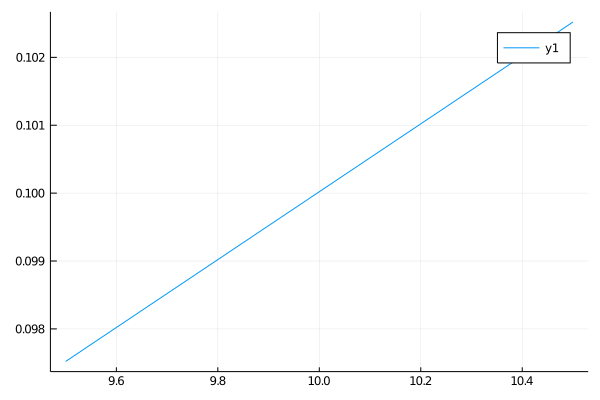

In [4]:
## Programa las función alfa_n como función del voltaje V.
## Necesitarás definir un caso especial cuando V - 10 < epsilon
## Utiliza esta celda para ver como se comporta tu función en esta vecindad
## y elegir un valor de epsilon adecuado

function alpha_n(V)                                  #Definimos la funcion alpha_n 
      epsilon = 0.001                                #Elejimos un epsilon conveniente, asi conforme V-10 se acerque a cero 
                                                     #la funcion valdra 0.1 
    if abs(V - 10) < epsilon                         #Por lo tanto si el absoluto de V - 10 es menor que epsilon entonces se 
        alpha_n = 0.1                                #alpha_n valdra 0.1
       
    else                                             #Si la anterior condicion no se cumple entonces V se evaluara en la 
        alpha_n = 0.01*(10-V)/(exp((10-V)/10) - 1)   #siguiente expresion 
       
    end
   
    println(alpha_n)                                 #Imprimimos los resultados de evaluar V en alpha 
    return alpha_n
end


plot(alpha_n, 9.5:10.5)                              #Graficamos alpha evaluada V = 9.5:10.5

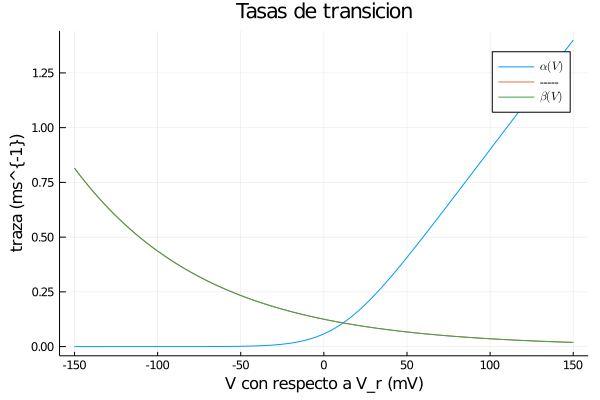

"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"latex" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
latex: failed to create a dvi file
latex: failed to create a dvi file


In [73]:
## Programa la funciones como función del voltaje V, para la compuerta de K
## Genera luego una gráfica de alfa_n y beta_n

function beta_n(V)                                #Ahora definimos la funcion β(V)
    beta_n = 0.125.*(exp(-(V./80)))               #Definimos la expresion de la funcion β
    return beta_n  
end


function alpha_n(V)                              #Definimos la función alpha_n nuevamente por practicidad 
    epsilon = 0.001
    
    if abs(V .- 10) .< epsilon
        alpha_n = 0.1
        
    else 
        alpha_n = 0.01.*(10 .- V)/(exp((10 .- V) ./ 10) .- 1)
        
    end
    
    return alpha_n
end


function plotAlpha()                            #Acontinuacion definimos una nueva funcion para graficar a β(V) y α(V)
    V = -150:150                                #Definimos un rango de voltaje que se evaluara en ambas funciones 
    alpha = alpha_n.(V)                         #Asignamos un nombre al vector, resultado de evaluar V 
    beta = beta_n.(V)
    plot(                                       #Ahora graficaremos a alpha rrespecto a V 
        V,
        alpha,
        title="Tasas de transicion",            #Le asignamos diferentes caracteristicas a la grafica generada como el titulo
        xlabel="V con respecto a V_r (mV)",#nombre los ejes y la letenda 
        ylabel="traza (ms^{-1})",
        label=L"$\alpha(V)$"
    ) 
    plot!(V, beta, label="-----")
    plot!(V, beta, label=L"\beta(V)")           #Posteriormente sobre la grafica anterior graficamos β(V) para poder observar 
                                                #como se comportan ambas funciones 
end                                             


plotAlpha()

Las funciones para el **sodio (Na)** son:
\begin{align}
  \alpha_m(V) &= \frac{0.1(25 - V)}{e^{\left(\frac{25-V}{10}\right)} - 1}
\end{align}

\begin{align}
  \beta_m(V) &= 4 e^{-\frac{V}{18}}
\end{align}

\begin{align}
  \alpha_h(V) &= 0.07 e^{-\frac{V}{20}}
\end{align}

\begin{align}
  \beta_h(V) &= \frac{1}{e^{\left(\frac{30-V}{10}\right)} + 1}
\end{align}

Para $\alpha_m$ cuando $V = 25$, utilizamos la regla de L'Hopital para calcular el límite:
\begin{align}
  \alpha_m(25) = \frac{-0.1}{e^{\left(\frac{25-V}{10}\right)}(-0.1)} = \frac{-0.1}{-0.1} = 1
\end{align}

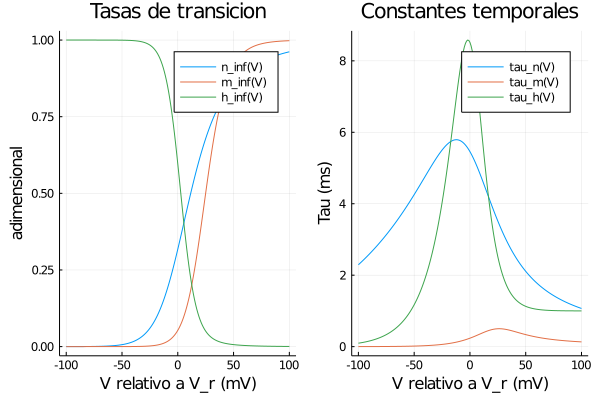

In [74]:
## Dadas alfa y beta, calcular ahora y graficar n y tau para ambos canales.

## Agrega las funciones correspondientes para la compuerta de sodio también,
## deduce sus definiciones a partir de las llamadas en la función para graficar

#A continuacion definimos las funciones de transición para n, m y h y la probabilidad de estado estacionario para n denotado 
#como n_inf y las constante de tiempo tau para los tres canales 
function alpha_m(V)  #Definimos la funcion alpha del canal n
    alpha = []       #Creamos un vector llamado alpha
    for i in V       #Como el voltaje a avaluar es un rango entonces haremos uso de bucle if
        if i == 25   #donde i tomara cuertos valores de V hasta finalizar con el rango
            alpha_m = 1  #Asi cuando i valga 25 entonces la funcon valdra 1 y este valor sera colocado
            push!(alpha, alpha_m) #en el vector alpha, esto lo hacenmos con la funcion push!
        else
            alpha_m = (0.1 * (25 .- i)) ./ (exp.((25 .- i) ./ 10) .- 1)
            push!(alpha, alpha_m)
        end
    end
    return alpha
end

function beta_m(V)   #Definimos la expresion de la funcion d etrancicion β_m(V) la cual evaluara
    beta_m = 4 * exp.(-V ./ 18) #V en las siguiente expresion
    return beta_m
end

function alpha_h(V)   #Definimos la expresion de la función d etrancicion β_m(V) la cual evaluara
    alpha_h = 0.07 * exp.(-V ./ 20)
    return alpha_h
end

function beta_h(V)
    beta_h = 1 ./ (exp.((30 .- V) ./ 10) .+ 1)
    return beta_h
end

function beta_n(V)
    beta_n = 0.125 * exp.(-V ./ 80)
    return beta_n
end

function alpha_n(V)
    alpha = []
    for i in V
        if i == 10
            alpha_n = 0.1
            push!(alpha, alpha_n)
        else
            alpha_n = (0.01 * (10 .- i)) ./ (exp.((10 .- i) ./ 10) .- 1)
            push!(alpha, alpha_n)
        end
    end
    return alpha
end

function tau_inf(alpha, beta)
    tau_inf = 1 ./ (alpha .+ beta)
    return tau_inf
end

function n_inf(alpha, beta)
    n_inf = alpha ./ (alpha .+ beta)
    return n_inf
end

function plotParameters()   #Genera gráficas de tasas de transición
    V = -100:100    #Rango
    #Parámetros
    n_inf_n = n_inf(alpha_n(V), beta_n(V))
    tau_inf_n = tau_inf(alpha_n(V), beta_n(V))
    
    n_inf_m = n_inf(alpha_m(V), beta_m(V))
    tau_inf_m = tau_inf(alpha_m(V), beta_m(V))
    
    n_inf_h = n_inf(alpha_h(V), beta_h(V))
    tau_inf_h = tau_inf(alpha_h(V), beta_h(V))
    
    p1 = plot(
        V,
        [n_inf_n, n_inf_m, n_inf_h],
        title="Tasas de transicion",
        xlabel="V relativo a V_r (mV)",
        ylabel="adimensional",
        label=["n_inf(V)" "m_inf(V)" "h_inf(V)"],
        legend=:topright
    )
    
    p2 = plot(
        V,
        [tau_inf_n, tau_inf_m, tau_inf_h],
        title="Constantes temporales",
        xlabel="V relativo a V_r (mV)",
        ylabel="Tau (ms)",
        label=["tau_n(V)" "tau_m(V)" "tau_h(V)"],
        legend=:topright
    )
    
    plot(p1, p2, layout=(1, 2))
end

plotParameters()

![tasas_constantes](figuras/tazas-y-constantes.jpg)

## Simulación con el método numérico de Euler

El método de Euler realiza una aproximación a la función por su tangente.  Dada una ecuación diferencial de la forma:

\begin{align}
  \frac{dy(t)}{dt} = f(y(t))
\end{align}

Partimos de un punto inicial $(t_0, y_0)$ y calculamos el valor de $y$ para el tiempo $t + \Delta t$ en dicho punto iterativamente como:

\begin{align}
  y(t + \Delta t) &= y(t) + \Delta t f(y(t))
\end{align}

El error aproximado por realizar esta aproximación es:
\begin{align}
  E =& \frac{1}{2} \frac{df(t)}{dt}(\Delta t)^2
\end{align}

Aplicando esta fórmula a la ecuación para los canales:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V)}{\tau_n} - \frac{n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

Se obtienen fórmulas análogas para $m$ y $h$.  Todas juntas pueden ser escritas en forma matricial:

\begin{align}
  \begin{bmatrix}
  n(t + \Delta t) \\
  m(t + \Delta t) \\
  h(t + \Delta t)
  \end{bmatrix} =& 
  \begin{bmatrix}
  (1 - \Delta t/\tau_n(V)) & 0 & 0 \\
  0 & (1 - \Delta t/\tau_m(V)) & 0 \\
  0 & 0 & (1 - \Delta t/\tau_h(V)) \\
  \end{bmatrix}
  \begin{bmatrix}
  n(t) \\
  m(t) \\
  h(t)
  \end{bmatrix} +
  \begin{bmatrix}
  (\Delta t / \tau_n(V)) n^{\infty}(V) \\
  (\Delta t / \tau_m(V)) m^{\infty}(V) \\
  (\Delta t / \tau_h(V)) h^{\infty}(V)
  \end{bmatrix}
\end{align}

Brevemente:

\begin{align}
  \boldsymbol{\Pi}(t + \Delta t) =& \boldsymbol{A}_\pi \boldsymbol{\Pi}(t) + \boldsymbol{B}_\pi
\end{align}

Se debe realizar el mismo procedimiento con la ecuación diferencial para el voltaje.  Para simplificar la notación, introduzcamos:

\begin{align}
  G_{Na} = g_{Na}m^3h
\end{align}

\begin{align}
  G_{K} = g_K n^4
\end{align}

Entonces:
\begin{align}
 C_m \frac{dV}{dt} &= -g_{Na}m^3h(V-E_{Na}) - g_K n^4 (V - E_K) - g_L (V - E_L) + I_{ext} \\
 \frac{dV}{dt} &= -\frac{G_{Na}}{C_m}(V-E_{Na}) - \frac{G_K}{C_m} (V - E_K) - \frac{g_L}{C_m} (V - E_L) + \frac{1}{C_m}I_{ext}
\end{align}

Utilizando el método de Euler:

\begin{align}
 V(t + \Delta t) &= V(t) - \frac{\Delta t}{C_m} \left[ G_{Na}(V-E_{Na}) + G_K (V - E_K) + g_L (V - E_L) + I_{ext}(t) \right] \\
 V(t + \Delta t) &= V(t) - \Delta t \begin{bmatrix} \frac{G_{Na}}{C_m} & \frac{G_K}{C_m} & \frac{g_L}{C_m} \end{bmatrix}  \begin{bmatrix}
                 V(t)-E_{Na} \\
                 V(t)- E_K \\
                 V(t) - E_L
                \end{bmatrix} + \frac{\Delta t}{C_m}I_{ext}(t)
\end{align}

Para los valores por defecto propuestos en la celda siguiente, programar una simulación utilizando los resultados obtenidos con el método de Euler y produce la figura siguiente:

![simulacion](figuras/Simulacion.png)

In [76]:
# NOTA
# Los diccionarios son objectos que almacenan datos de la forma llave-valor (key-value)
# muy útiles para trabajar con información que tiene que ser etiquetada. Puedes encontrar más
# información sobre como trabajar con ellos en la documentación oficial de Julia:
# https://docs.julialang.org/en/v1/base/collections/#Dictionaries

parametros = Dict(
    "DeltaT" => 0.01,   # ms
    "maxT" => 50.0,     # ms    
    "V0" => 0.0,        # mV
    "gNa" => 120.0,     # mS/cm2
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,        # micro F/cm2
    "ENa" => 115.0,     # Utilizando la convensión original de Hodkin-Huxley
    "EK" => -12.0,
    "EL" => 10.613
)




function makeIext(t0=10.0, tfin=16.0, current=6.5)
    function Iext(t)
        """ Devuelve el valor de la corriente aplicada a la membrana, al tiempo t, en microampers.
        """
        if (t>t0) & (t<tfin)
            return current # micro A/cm2
        else
            return 0
        end
    return Iext
    end
end

makeIext (generic function with 4 methods)

In [77]:
function n_inf(V) #Para valor de n
    return 0.01 * (V-10)/(1-exp(-(V-10)/10))
end

n_inf (generic function with 2 methods)

In [78]:
function m_inf(V) #Para valor de m
    return 0.1 * (V-25)/(1-exp(-(V-25)/10))
end

m_inf (generic function with 1 method)

In [79]:
function h_inf(V) #Para valor de h
    return 0.07 * exp(-V/20)
end

h_inf (generic function with 1 method)

In [80]:
function tau_n(V) #Tasa transición entre estado de canal iónico para excitabilidad de neurona, cuánto cambian y tiempo para equilibrio
    return 0.5 / (exp(-(V-10)/10)+exp((V+10)/10))
end

tau_n (generic function with 1 method)

In [81]:
function tau_m(V)
    return 1 / (exp(-(V - 25) / 10) + exp((V + 55) / 10))
end

tau_m (generic function with 1 method)

In [82]:
function tau_h(V)
    return 1 / (exp((V + 30) / 10) + exp(-(V + 50) / 10))
end

tau_h (generic function with 1 method)

In [83]:
# Implementa aquí el resultado del algoritmo de intregración numérica de Euler para calcular V(t).
# Asegúrate de que, al ejecutar la simulación con los parámetros por defecto, se reproduce la imagen de arriba.
# Después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes
# ¿Qué observas?
# Inserta al final una celda con tus comentarios y resultados

function simulate(parametros, I_ext_func) #Argumentos, diccionario y función de corriente externa
    DeltaT = parametros["DeltaT"] #Paso tiempo
    maxT = parametros["maxT"] #Tiempo máx simulación
    V0 = parametros["V0"] #V inicial
    gNa = parametros["gNa"] #Conductancia
    gK = parametros["gK"] #Conductancia
    gL = parametros["gL"] #Conductancia
    Cm = parametros["Cm"] #Capacitancia membrana
    ENa = parametros["ENa"] #Potencial de equilibrio
    EK = parametros["EK"] #Potencial de equilibrio
    EL = parametros["EL"] #Potencial de equilibrio

    num_steps = Int(maxT / DeltaT) + 1 #Pasos para intervalo divide duración máx tiempo entre paso de tiempo y redondea con Int con +1 para incluir último punto de arreglo
    t = range(0, step=DeltaT, length=num_steps) #Intervalo valores para tiempo 
    V = zeros(num_steps) #Arreglos, almacenar valores durante tiempo
    G_Na = zeros(num_steps)
    G_K = zeros(num_steps)
    n = zeros(num_steps)
    m = zeros(num_steps)
    h = zeros(num_steps)
    I_ext = zeros(num_steps)

    V[1] = V0 #Inician valores utilizando funciones
    n[1] = n_inf(V0)
    m[1] = m_inf(V0)
    h[1] = h_inf(V0)
    G_Na[1] = gNa * m[1]^3 * h[1]
    G_K[1] = gK * n[1]^4
    I_ext[1] = I_ext_func(t[1])

    for i in 2:num_steps #Por paso de tiempo se calcula valor con las ecuaciones 
        V[i] = V[i-1]-(DeltaT/Cm) * (G_Na[i-1] * (V[i-1]-ENa) + G_K[i-1] * (V[i-1]-EK)+gL * (V[i-1]-EL) + I_ext[i-1])
        n[i] = n[i-1] + DeltaT * ((n_inf(V[i-1])/tau_n(V[i-1])) - (n[i-1]/tau_n(V[i-1])))
        m[i] = m[i-1] + DeltaT * ((m_inf(V[i-1])/tau_m(V[i-1])) - (m[i-1]/tau_m(V[i-1])))
        h[i] = h[i-1] + DeltaT * ((h_inf(V[i-1])/tau_h(V[i-1])) - (h[i-1]/tau_h(V[i-1])))
        G_Na[i] = gNa * m[i]^3 * h[i]
        G_K[i] = gK * n[i]^4
        I_ext[i] = I_ext_func(t[i])
    end

    return t, V, G_Na, G_K, n, m, h #Devuelve arreglos
end

simulate (generic function with 1 method)

**Después prueba con pulsos de t en 10->30, con corrientes de 10 y -10 microamperes
¿Qué observas?**

Considerando que el estímulo es constante durante las pulsaciones podemos ver patrones de excitación que cuando variamos $I$ está siendo menor a 2 entonces veremos un pequeño potencial de membrana que regresara al reposo rápidamente, sin poder desencadenar un potencial de acción, pues no rebasara el umbral. 

Ahora cuando $2 < I < 7$ entonces se observara que solo se genera un potencial de acción, esto debido a que $I$ no es lo suficiente grande para desencadenar una ráfaga de potenciales de acción. 

Por otra parte, cuando $I>7$ entonces si se generara una ráfaga de potenciales de acción conectados en el periodo refractario de cada uno de los potenciales de acción, cabe mencionar que la duración de este potencial no varía con $I$. 

In [84]:
function plot_simulation(t, V, G_Na, G_K, n, m, h)
    p1 = plot(t, V, xlabel="Tiempo (ms)", ylabel="Voltaje relativo en la membrana (mV)", label="Voltaje en la membrana", xticks=10:10:50, xlims=(minimum(t), maximum(t)), ylims=(-100, 100))
    p2 = plot(t, [G_Na G_K], xlabel="Tiempo (ms)", ylabel="Conductancia (mS/cm^2)", label=["Na" "K"], xticks=10:10:50, xlims=(minimum(t), maximum(t)), ylims=(0, 40))
    p3 = plot(t, n, xlabel="Tiempo (ms)", ylabel="Tasa de transición adimensional", label="Tasa de transición n", xticks=10:10:50, xlims=(minimum(t), maximum(t)), ylims=(0.0, 1.0))
    p4 = plot(t, [tau_n.(V) tau_m.(V) tau_h.(V)], xlabel="Tiempo (ms)", ylabel="tau (ms)", label=["tau_n" "tau_m" "tau_h"], xticks=10:10:50, xlims=(minimum(t), maximum(t)), ylims=(0, 9))
    plot(p1, p2, p3, p4, layout=(1, 4), legend=:topright)
end

plot_simulation (generic function with 1 method)

In [85]:
parametros = Dict(
    "DeltaT" => 0.1,
    "maxT" => 50.0,
    "V0" => 0.0,
    "gNa" => 120.0,
    "gK" => 36.0,
    "gL" => 0.3,
    "Cm" => 1.0,
    "ENa" => 115.0,
    "EK" => -12.0,
    "EL" => 10.613
)

Dict{String, Float64} with 10 entries:
  "EL"     => 10.613
  "gK"     => 36.0
  "gNa"    => 120.0
  "maxT"   => 50.0
  "gL"     => 0.3
  "ENa"    => 115.0
  "DeltaT" => 0.1
  "V0"     => 0.0
  "Cm"     => 1.0
  "EK"     => -12.0

In [86]:
I_ext_func = makeIext(10.0, 16.0, 6.5)

(::var"#Iext#2"{Float64, Float64, Float64}) (generic function with 1 method)

In [87]:
t, V, G_Na, G_K, n, m, h = simulate(parametros, I_ext_func)

(0.0:0.1:50.0, [0.0, 1.3972912518723257, 2.7394910028060204, 57.07785950525263, -321517.32370898646, -6.530141439834982e23, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [0.0938605933203804, 0.0938605933203804, 4.819417759479506, -55518.148908043826, -2.030312552158628e19, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [0.0004129760933739559, 0.0004129760933739559, 0.0005874303241549847, 0.000798621236970369, 7.09285556538048e8, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [0.05819767068693265, 0.05819767068693265, 0.06355701107604901, 0.06862930304618874, 66.6238389792894, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [0.22356372458463003, 0.22356372458463003, 0.8792400539799312, -19.31092537881072, 166944.8424053766, NaN, NaN, NaN, NaN, NaN  …  NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN], [0.07, 0.07, 0.059086863214104265, 0.06424576050109997, -36.36324

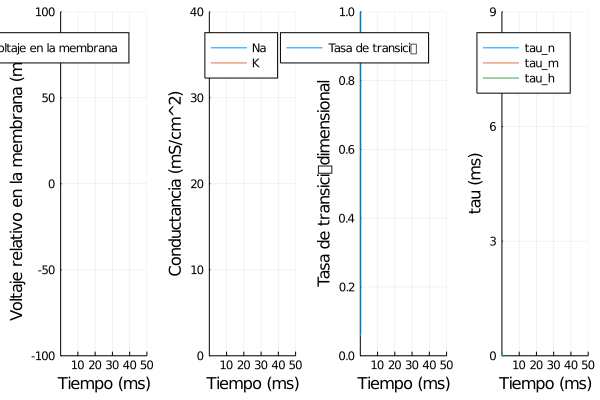

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [89]:
plot_simulation(t, V, G_Na, G_K, n, m, h) #Simulación

# Comentarios y resultados

## Modelo de Hodgkin-Huxley

Las membranas de las células nerviosas y musculares pueden transmitir señales eléctricas gracias al estudio del modelo de Hodgkin-Huxley sobre los canales iónicos de la membrana celular. La generación y propagación de potenciales de acción depende de ello, por tanto, las alteraciones en la permeabilidad de la membrana al sodio, potasio y calcio tienen un efecto sobre la excitabilidad celular y la corriente iónica y pueden ser expresadas como ecuaciones diferenciales describiendo la dinámica de los canales y corrientes de iones. Los comportamientos de cada uno de ellos, determinan la apertura y el cierre de los canales iónicos de la membrana, que en el modelo se clasifican en tres tipos: canales de fuga de potasio, canales de potasio, y canales de sodio dependientes de voltaje. En otras palabras, el modelo describe cómo los canales iónicos en la membrana controlan el potencial de acción permitiendo la comunicación eléctrica entre células.

**Graficación de $\alpha_n(V)$ y $\beta_n(V)$**

En este caso $\alpha_n(V)$ y $\beta_n(V)$ representan constantes de velocidad asociados al canal de potasio, esta expresión tienen como unidades los milisegundos reciprocos, mientras que su parámetro V esta dado en mili volt se define con la diferencia entre el potencial de membrana en un momento específico y el potencial de membrana en reposo. 

En la gráfica podemos observar que $\alpha_n(V)$ se mantiene casi en cero en los voltajes negativos debido a que el potencial en reposo es negativo pero en cuanto V comienza a ser positivo entonces alpha comienza a tener un rápido crecimiento; mientras que $\beta_n(V)$ tiene un decrecimiento exponencial menos rápido que el crecimiento de $\alpha_n(V)$. 

De lo anterior concluimos que $\alpha_n(V)$ es la constante de velocidad cuando los canales cambian de abiertos a cerrados, mientras que $\beta_n(V)$ representa la constante de velocidad de cambio de canales cerrados a abiertos. Notemos que por lo tanto los canales tardan menos en cerrarse que en abrirse. Como comentario adicional también podemos concluir que $\alpha_m(V)$ y $\alpha_h(V)$ representan la apertura mientras que $\beta_m(V)$ y $\beta_h(V)$ definen el cierre de los canales de sodio de activación para m y para h canales de sodio de inactivación, por tanto también son constantes de velocidad. 


**Graficación tasas de transición de $n_{\infty}(V)$, $m_{\infty}(V)$ y $h_{\infty}(V)$**

Denotamos como $n_{\infty}(V)$, $m_{\infty}(V)$ y $h_{\infty}(V)$ a las probabilidades abiertas de estado estacionario, observemos que en la gráfica $n_{\infty}(V)$, $m_{\infty}(V)$ son crecientes cuando V es positivo lo que hace referencia a una dezpolarización de la membrana, sin embargo $h_{\infty}(V)$ es decreciente. 
Lo anterior significa que en la dezpolarización se producirá un rápido aumento de los canales abiertos de sodio y potasio lo que se verá reflejado en las gráficas de $n_{\infty}(V)$, $m_{\infty}(V)$, mientras que esto sucede también habrá un descenso en el número de canales de sodio de inactivación lo que se podrá notar en la visualización de $h_{\infty}(V)$

**Graficación de constantes temporales $\tau_n(V)$, $\tau_m(V)$ y $\tau_h(V)$**

En esta representación podemos observar las tres constantes de tiempo de forma estacionaria, obsérvese que $\tau_m(V)$ tiene una menor altura que $\tau_n(V)$ y $\tau_h(V)$. Lo anterior se puede traducir a que las puertas de activación de los canales se abrirán con mayor rapidez durante la dezpolarización en comparación con las otras compuertas, en el caso de las puertas de activación de K^+ se abrirá con retrazo en comparación con las de Na^+, no obstante, las puertas de inactivación de Na^+ comenzarán a cerrarse provocando así la repolarización de la membrana, esto lo podemos visualizar cuando $\tau_h(V)$ cae rápidamente por debajo de $n_{\infty}(V)$. 

### Simulación con el método numérico de Euler

**Graficación del voltaje de membrana $V(t)$**

Esta gráfica se halla en el último grupo de gráficas, en esta simplemente podemos observar con claridad el potencial de acción, al inicio se puede observar como éste está en reposo, en cuanto éste rebasa cierto umbral comienza la despolarización por tanto los canales de Na^+ se abren aumentando el sodio intracelular provocando que V se vuelva positivo. Conforme aumenta la despolarización se irán abriendo los canales de potasio activados por voltaje aumentando el K^+ extracelular. Una vez se llega a un equilibrio y ya no hay flujo de Na^+ entonces comienza la repolarización donde K^+ continuará saliendo provocando que V disminuya hasta volverse negativo. La repolarización continua hasta que el potencial llega al equilibrio con el potasio este equilibrio será más negativo que el de la potencia de reposo provocando una hiperpolarización, finalmente las bombas de Na^+/K^+ equilibran las concentraciones de ambos iones volviendo al potencial de reposo.

**Graficación de la conductancia de los canales $G_K$ y $G_{Na}$**

El gráfico anterior de potencial de acción está asociado con éste pues podemos observar que cuando el voltaje llega a su máximo punto de la despolarización, $G_{Na}$ también lo hace, pues este estímulo desencadenó un aumento de la conductancia en el canal de sodio por tanto, en el punto más alto de $G_{Na}$ las puertas de inactivación de sodio como respuesta al aumento de Na^+ inactivan los canales de sodio; en este punto es donde $G_K$ comienza a aumentar, lo que marca el inicio de la repolarización hasta que K^+ vuelva al potencial en reposo. Obsérvese que $G_K$ tiene una menor amplitud que $G_{Na}$, lo cual dependerá de las concentraciones de K^+ y Na^+, su velocidad de activación así como la corriente que presentan. 

**Graficación de las trazas de transicion $n$, $m$ y $h$**

$n$, $m$ y $h$ son parámetros de activación e inactivación de los canales  iónicos antes mencionados, por lo tanto, de esta gráfica podemos analizar que cuando sucede un potencial de acción como el anteriormente descrito con un I = 6.5 entonces $n$, $m$ y $h$ se comportaran de la forma en la que se muestra, se puede observar que $n$ y $m$ son crecientes, pues al momento en el que inicia la despolarización se activan las compuertas de los canales de $n$ y $m$; sin embargo, vemos que cuando la membrana se repolariza las puertas de los canales de potasio ($n$) permanecen activas a diferencia de las puertas del canal de sodio ($m$) pues estos  se cerraran rápidamente. Por otra parte, las puertas de inactivación del sodio se cerrarán en la despolarización, pero vemos que en cuanta inicia la repolarización estas se comienzan a abrir, gráficamente lo podemos observar cuando $h$ comienza a crecer. 

**Graficación de las constantes temporales $\tau_n(V)$, $\tau_m(V)$ y $\tau_h(V)$ **

Podemos notar que $\tau_n(V)$, $\tau_m(V)$ y $\tau_h(V)$ decrecen durante la despolarización, donde $\tau_h(V)$ decrece con mayor rapidez a diferencia de $\tau_n(V)$ y sobre todo de $\tau_h(V)$, mientras que en la repolarización sucede lo contrario, pues las constantes comienzan a crecer. Lo anterior nos indica que el tiempo de aperturas de las puertas de los tres canales $n$, $m$ y $h$ es muy corto durante la despolarización, mientras que cuando sucede la repolarización este tiempo de cierre de las puertas aumentara, observemos que las primeras en cerrarse serás $m$ y $n$ y por últimos serán las puertas de inactivación del canal de sodio $h$.




***Se decidio no hacer completo uso de LaTeXStrings debido a problemas con la paqueteria***

# Referencias 

Rois González, A., De, U., & De Compostela, S. (2020). Análisis numérico del modelo de Hodgkin-Huxley. https://minerva.usc.es/xmlui/bitstream/handle/10347/29107/Rois_Gonz%C3%A1lez_Alba.pdf?sequence=1

‌
Científica, Y., Tecnológica, A., Gonzalo, J., & Ramírez, B. (n.d.). INSTITUTO POTOSINO DE INVESTIGACIÓN Modelos Neuronales Memresistivos. Retrieved June 16, 2023, from https://repositorio.ipicyt.edu.mx/bitstream/handle/11627/2943/TMIPICYTT6M62016.pdf?sequence=1&isAllowed=y

‌
Sebastián, J., García, C., & Sanabria, C. (2016). https://repositorio.uniandes.edu.co/bitstream/handle/1992/17874/u728545.pdf?sequence=1&isAllowed=y

‌
Román Baravalle. (2015). Estudio de la dinámica neuronal utilizando integrales de caminos, teoría de la información y dinámica no lineal. https://www.semanticscholar.org/paper/Estudio-de-la-din%C3%A1mica-neuronal-utilizando-de-de-la-Baravalle/b1ce0e6c3be74ea534c08126c6ce1c4b34930509

‌
Fin De Grado, T., Castilla, E., Fernández, S., María, G., & Gómez Mármol, M. (2020). https://idus.us.es/bitstream/handle/11441/115148/GM%20P%C3%A9rez%20Castilla%2C%20Elenna.pdf?sequence=1&isAllowed=y

‌